### Problem Statement.

### Build the linear regression model using scikit learn in boston data to predict 'Price'
### based on other dependent variable.
### Here is the code to load the data.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [6]:
bos = pd.DataFrame(boston.data)

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
bos.isnull().sum(axis=0)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [11]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [62]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [189]:
from sklearn.linear_model import LinearRegression

In [192]:
lm = LinearRegression()
feature_col = [11]
X = bos[feature_col]
y_data = pd.DataFrame(boston.target)
feature_ycol = [0]
y = y_data[0]
lm.fit(X, boston.target)
print(lm.intercept_)
print(lm.coef_)

10.551034138417158
[0.03359306]


In [193]:
feature_col_new = [9]
x_new = bos[feature_col_new]
preds = lm.predict(x_new)
#preds

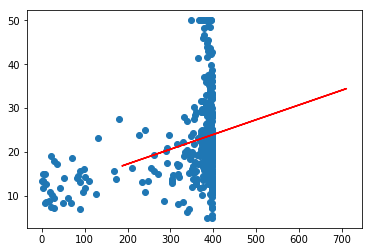

In [194]:
plt.scatter(x=X, y=y)
plt.plot(x_new, preds, c='red')

In [195]:
import statsmodels.formula.api as smf
lms = smf.ols(formula='X ~ y', data=bos).fit()
lms.conf_int()
lms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     63.05
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           1.32e-14
Time:                        00:02:13   Log-Likelihood:                -2971.8
No. Observations:                 506   AIC:                             5948.
Df Residuals:                     504   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    282.0884     10.144     27.809      0.000     262.159     302.018
y              3.3101      0.417      7.941      0.000       2.491       4.129
==============================================================================
Omnibus:                      260.408   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.883
Skew:                          -2.422   Prob(JB):                    4.89e-243
Kurtosis:                       8.429   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""